In [1]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [7]:
# Leyendo csvs
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")


# ¿En qué horas se registra la mayor cantidad de postulaciones/vistas?

In [3]:
df_vistas["hour"] = df_vistas["timestamp"].dt.hour
df_postulaciones["hour"] = df_postulaciones["fechapostulacion"].dt.hour
df_postulaciones["date"] =df_postulaciones["fechapostulacion"].dt.date

In [4]:
date_ini = datetime.date(year=2018,month=2,day=27)
date_fin = datetime.date(year=2018,month=2,day=28)
df_periodo_postulaciones = df_postulaciones[df_postulaciones["fechapostulacion"].dt.date >= date_ini]
df_periodo_vistas = df_vistas[(df_vistas["timestamp"].dt.date >= date_ini) & (df_vistas["timestamp"].dt.date <= date_fin)]

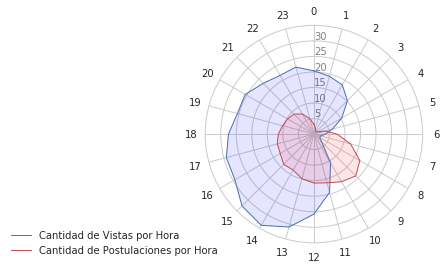

In [5]:
categories = range(0, 24) # 0 a 23 horas

# numero de variables categoricas
N = len(categories)

from math import pi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Inicializar el grafico
ax = plt.subplot(111, polar=True)
 
# Corremos el inicio para que comienze como un reloj (corro el origen 90°):
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Dibujamos un eje por categoria
plt.xticks(angles[:-1], categories)

# Dibujo labels en y
ax.set_rlabel_position(0)
plt.yticks([5000,10000,15000,20000,25000,30000], ["5","10","15","20","25","30"], color="grey", size=10)
plt.ylim(0,35000)

# Serie de datos para las vistas por hora
values2 = list(df_periodo_vistas.groupby("hour")["idAviso"].count())
values2 += values2[:1]
ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Cantidad de Vistas por Hora")
ax.fill(angles, values2, 'b', alpha=0.1)

# Serie de datos para las postulaciones por hora
values = list(df_periodo_postulaciones.groupby("hour")["idaviso"].count())
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = "C2", label="Cantidad de Postulaciones por Hora")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# ¿Cómo es la distribución de edades de los postulantes?

In [44]:
# limpieza de fechas invalidas
df_gen_edad["fechanacimiento"] = pd.to_datetime(df_gen_edad["fechanacimiento"], errors="coerce")

def calc_edad(x):    
    if (pd.isnull(x)):
        return -1
    return math.floor((datetime.datetime.today()-x).days / 365)

# calculo edad para cada postulante
df_gen_edad["edad"] = df_gen_edad["fechanacimiento"].apply(calc_edad)

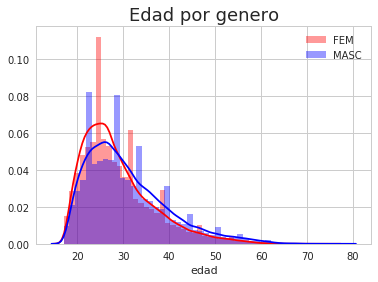

In [43]:
df_gen_edad_valida = df_gen_edad.loc[(17 <= df_gen_edad['edad']) & (df_gen_edad['edad'] <= 80)]

df_edad_fem = df_gen_edad_valida.loc[df_gen_edad_valida['sexo'] == 'FEM']
df_edad_masc = df_gen_edad_valida.loc[df_gen_edad_valida['sexo'] == 'MASC']
#df_edad_no_declara = df_gen_edad_valida.loc[df_gen_edad_valida['sexo'] == 'NO_DECLARA']

g = sns.distplot(df_edad_fem['edad'], color='red', label='FEM')
g = sns.distplot(df_edad_masc['edad'], color='blue', label='MASC')
#g = sns.distplot(df_edad_no_declara['edad'], color='green', label='NO_DECLARA')
g.set_title("Edad por genero", fontsize=18)
g.legend()

# ¿Cuáles areas tienen mayor postulaciones por nivel educativo?

        idpostulante             nombre      estado  prioridad_nom  \
0            0z5VvGv         Secundario    Graduado              5   
1            0zBDOjM         Secundario    Graduado              5   
2            0zPKKqd  Terciario/Técnico    Graduado              4   
3            0zPKMo1      Universitario    En Curso              3   
4            0zPKjBM      Universitario    Graduado              3   
5            0zr6xxE      Universitario    En Curso              3   
6             1BY0ON      Universitario    En Curso              3   
7              1Kd9N      Universitario    En Curso              3   
8            1Q4aEON  Terciario/Técnico    Graduado              4   
9            1QPB6lz         Secundario    Graduado              5   
10           1QPBzmE      Universitario  Abandonado              3   
11           1QPL55N         Secundario    Graduado              5   
12           1QPM4V3         Secundario    Graduado              5   
13           1QkzYQB

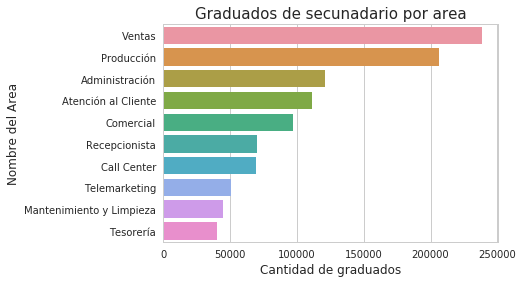

In [19]:
orden_nombre = {
    "Doctorado":0,
    "Master":1,
    "Posgrado":2,
    "Universitario":3,
    "Terciario/Técnico":4,
    "Secundario":5,
    "Otro":6
}

orden_estado = {
    "Graduado":0,
    "En Curso":1,
    "Abandonado":2,
}

df_edu["prioridad_nom"] = df_edu["nombre"].apply(lambda nombre: orden_nombre.get(nombre))
df_edu["prioridad_est"] = df_edu["estado"].apply(lambda estado: orden_estado.get(estado))

df_edu.sort_values(by= ["idpostulante","prioridad_est","prioridad_nom"],inplace= True)

df_edu_unicos_max = df_edu.drop_duplicates(subset = "idpostulante",keep= "first")

df_edu_max_postulaciones = df_edu_unicos_max.merge(df_postulaciones, on = "idpostulante")

df_aviso_corto = df_avisos_detalle[["idaviso","tipo_de_trabajo","nivel_laboral","nombre_area"]]

df_max_post_detalle = df_edu_max_postulaciones.merge(df_aviso_corto, on = "idaviso")

top_10_areas_graduados_secundario = df_max_post_detalle[df_max_post_detalle["nombre"] == "Secundario"] \
                                        .groupby("nombre_area")['idpostulante']\
                                        .count() \
                                        .sort_values(ascending=False) \
                                        .head(10)

g = sns.barplot(x=top_10_areas_graduados_secundario.values, y=top_10_areas_graduados_secundario.index, orient='h')
g.set_title("Graduados de secunadario por area", fontsize=15)
g.set_xlabel("Cantidad de graduados", fontsize=12)
g.set_ylabel("Nombre del Area", fontsize=12)

Text(0,0.5,'Nombre del Area')

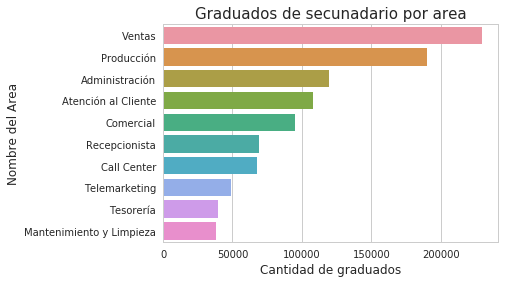

In [25]:

top_10_areas_graduados_secundario = df_max_post_detalle[(df_max_post_detalle["nombre"] == "Secundario") & (df_max_post_detalle["estado"] == "Graduado")] \
                                        .groupby("nombre_area")['idpostulante']\
                                        .count() \
                                        .sort_values(ascending=False) \
                                        .head(10)

g = sns.barplot(x=top_10_areas_graduados_secundario.values, y=top_10_areas_graduados_secundario.index, orient='h')
g.set_title("Graduados de secunadario por area", fontsize=15)
g.set_xlabel("Cantidad de graduados", fontsize=12)
g.set_ylabel("Nombre del Area", fontsize=12)

Text(0,0.5,'Nombre del Area')

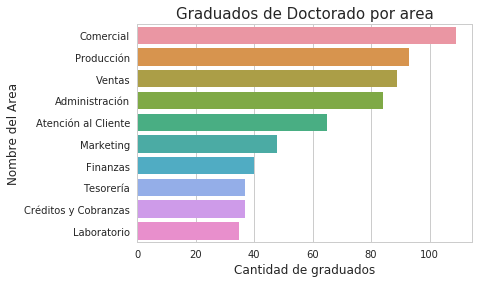

In [24]:

top_10_areas_graduados_doctorado = df_max_post_detalle[(df_max_post_detalle["nombre"] == "Doctorado") & (df_max_post_detalle["estado"] == "Graduado")] \
                                        .groupby("nombre_area")['idpostulante']\
                                        .count() \
                                        .sort_values(ascending=False) \
                                        .head(10)
                
g = sns.barplot(x=top_10_areas_graduados_doctorado.values, y=top_10_areas_graduados_doctorado.index, orient='h')
g.set_title("Graduados de Doctorado por area", fontsize=15)
g.set_xlabel("Cantidad de graduados", fontsize=12)
g.set_ylabel("Nombre del Area", fontsize=12)